<a href="https://colab.research.google.com/github/masrik-dev/Deep-Learning-with-TensorFlow-and-Python/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction to Regression with Neural Networks in TensorFlow

 There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


# Creating data to view and fit

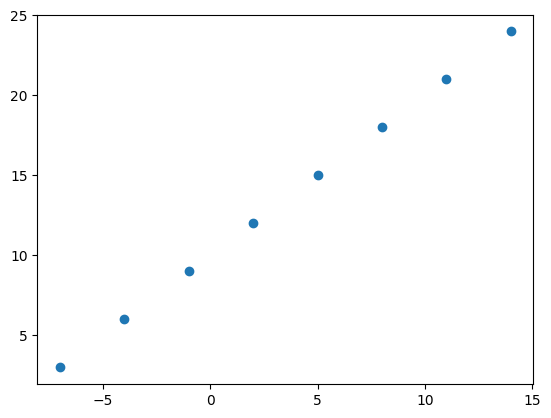

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [4]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [7]:
X[1], Y[1]

(np.float64(-4.0), np.float64(6.0))

In [8]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [9]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [12]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
X.ndim, Y.ndim

(1, 1)

In [14]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

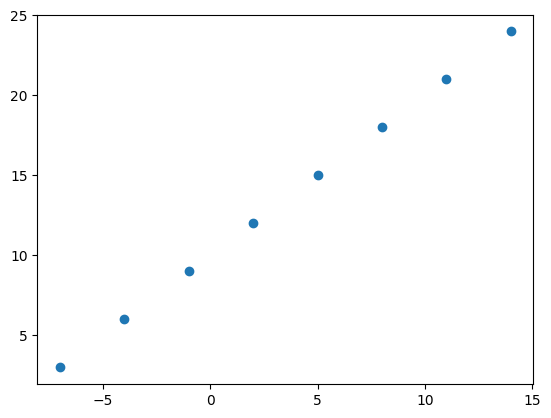

In [15]:
plt.scatter(X, Y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input an doutput layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is), the optimizer (tells our model how to improve the patterns its learning), and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (feqtures and labels).


In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.6819 - mae: 13.6819
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 13.5494 - mae: 13.5494
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 13.4169 - mae: 13.4169
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 13.2844 - mae: 13.2844
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 13.1519 - mae: 13.1519


In [17]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Try and make a prediction using this model
P = model.predict(np.array([17.0])) # make input as NumPy array
T = model.predict(tf.constant([17.0])) # make input as Tensor
P, T

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


(array([[2.1416051]], dtype=float32), array([[2.1416051]], dtype=float32))

In [19]:
model.predict(tf.constant([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[2.510712]], dtype=float32)

### **Improving our model**

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [20]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 19.5459 - mae: 19.5459
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 19.2646 - mae: 19.2646
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 18.9834 - mae: 18.9834
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 18.7021 - mae: 18.7021
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 18.4209 - mae: 18.4209
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 18.1396 - mae: 18.1396
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 17.8584 - mae: 17.8584
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 17.5771 - mae: 17.5771
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 17.2959 - mae: 17.2959
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 17.0146 - mae: 17.0146
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 16.7334 - mae: 16.7334
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 16.4521 - mae: 16.4521
Epoch 13/100
1/1 ━━━━━

In [21]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[29.169365]], dtype=float32)

### **Let's update our model again**

In [23]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - loss: 13.3782 - mae: 13.3782
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 12.8777 - mae: 12.8777
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.3740 - mae: 12.3740
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.8624 - mae: 11.8624
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.3384 - mae: 11.3384
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.7972 - mae: 10.7972
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.2405 - mae: 10.2405
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 9.6720 - mae: 9.6720
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.0762 - mae: 9.0762
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.4433 - mae: 8.4433
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.7740 - mae: 7.7740
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.0554 - mae: 7.0554
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [24]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


array([[32.888317]], dtype=float32)

### **Let's improve our model again**

* Next, increase the number of hidden units (we already tried **tf.keras.layers.Dense(100, activation="relu")**), so we skip this part.
* Now, we will change the **activation function**

In [26]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step - loss: 12.8522 - mae: 12.8522
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 12.3466 - mae: 12.3466
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 11.8362 - mae: 11.8362
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 11.3184 - mae: 11.3184
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 10.7906 - mae: 10.7906
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 10.2500 - mae: 10.2500
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 9.6938 - mae: 9.6938
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 9.1193 - mae: 9.1193
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 8.5234 - mae: 8.5234
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 7.9031 - mae: 7.9031
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 7.2574 - mae: 7.2574
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 7.2376 - mae: 7.2376
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [27]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [28]:
# Let test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[29.328007]], dtype=float32)

### **Again, Let improve our model**
* Change the optimization function from **SGD** to **Adam**

In [29]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.4388 - mae: 13.4388
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 13.3392 - mae: 13.3392
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 13.2395 - mae: 13.2395
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 13.1398 - mae: 13.1398
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 13.0401 - mae: 13.0401
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 12.9404 - mae: 12.9404
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 12.8407 - mae: 12.8407
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 12.7409 - mae: 12.7409
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 12.6410 - mae: 12.6410
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 12.5411 - mae: 12.5411
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 12.4411 - mae: 12.4411
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 12.3410 - mae: 12.3410
Epoch 13/100
1/1 ━━

In [30]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [31]:
# Test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[30.166533]], dtype=float32)

### **Let's improve our model again**
* Change the **learning rate = lr** of the optimization function **Adam()**

In [32]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # default lr= 0.001
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step - loss: 14.9072 - mae: 14.9072
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 13.9081 - mae: 13.9081
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.9206 - mae: 12.9206
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.9408 - mae: 11.9408
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.9644 - mae: 10.9644
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 9.9865 - mae: 9.9865
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.0015 - mae: 9.0015
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.0034 - mae: 8.0034
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.9861 - mae: 6.9861
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.6911 - mae: 6.6911
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.1342 - mae: 7.1342
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.5490 - mae: 7.5490
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [34]:
# Let's test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[27.744545]], dtype=float32)

### **Almost correct prediction but not super good**

> when it comes to evaluation... **Visualize it**

It's a good idea to visualize:
* **The Data -** what data are we working with? What does it look like?
* **The model itself -** what does our model look like?
* **The training of a model -** how does a model perform while it learns?
* **The predictions of the model -** how do the predictions of a model line up against the ground truth (the original labels)?

In [35]:
# Make a biddger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [36]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

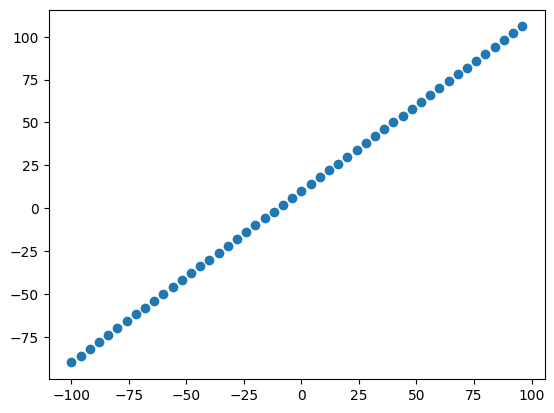

In [37]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### **The 3 sets**
* **Training set -** the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set -** the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set -** the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [38]:
# Check the length of how many samples we have
len(X)

50

In [39]:
# Split the data into train and test sets
X_train = X[0:40]   # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]   # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
* Now, we'he got our data in training and test sets. Let's visualize it again!

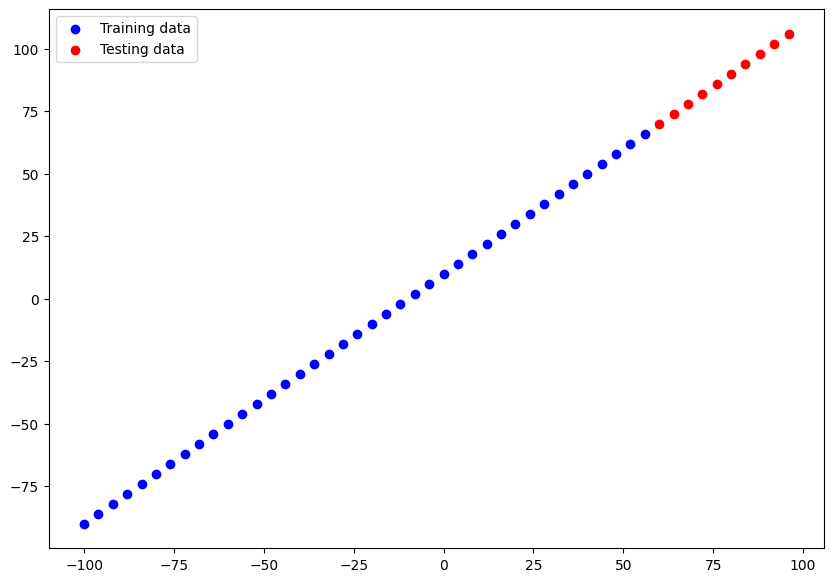

In [40]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in red
plt.scatter(X_test, y_test, c="r", label="Testing data")

# Show a legend
plt.legend();

In [41]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 32.7082 - mae: 32.7082 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.5910 - mae: 9.5910
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.1722 - mae: 11.1722
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.8000 - mae: 7.8000
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.6577 - mae: 11.6577
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.6131 - mae: 8.6131
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.0819 - mae: 10.0819
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.8033 - mae: 11.8033
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.7229 - mae: 8.7229
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.1916 - mae: 10.1916
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.9598 - mae: 11.9598
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.6443 - mae: 12.6443
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [42]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during **transfer learning**).

🎬**Resource:** For a more in-depth overview of the trainable parameters within a layer: **MIT's introduction to deep learning video** https://www.youtube.com/watch?v=alfdI7S6wCY



In [44]:
# We will change the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling "model.summary()"
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [45]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
print(X_train.ndim)

1


In [47]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-1), epochs=100, verbose=1) # Reshape the dimension of y_train to match output

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 22.1088 - mae: 22.1088 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12.2777 - mae: 12.2777
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.6672 - mae: 7.6672
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.8989 - mae: 7.8989
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.8339 - mae: 7.8339 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.8732 - mae: 7.8732
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.8897 - mae: 7.8897 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.8407 - mae: 7.8407 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 7.6440 - mae: 7.6440
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 7.7151 - mae: 7.7151 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.8715 - mae: 7.8715
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.8222 - mae: 7.8222
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [48]:
# Get a summary of our model
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

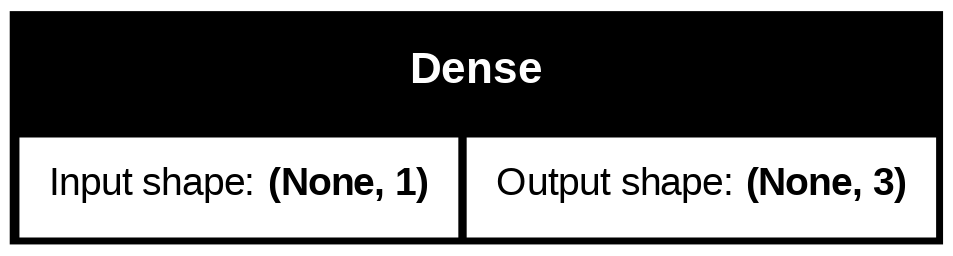

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [50]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-1), epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Get a summary of our model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

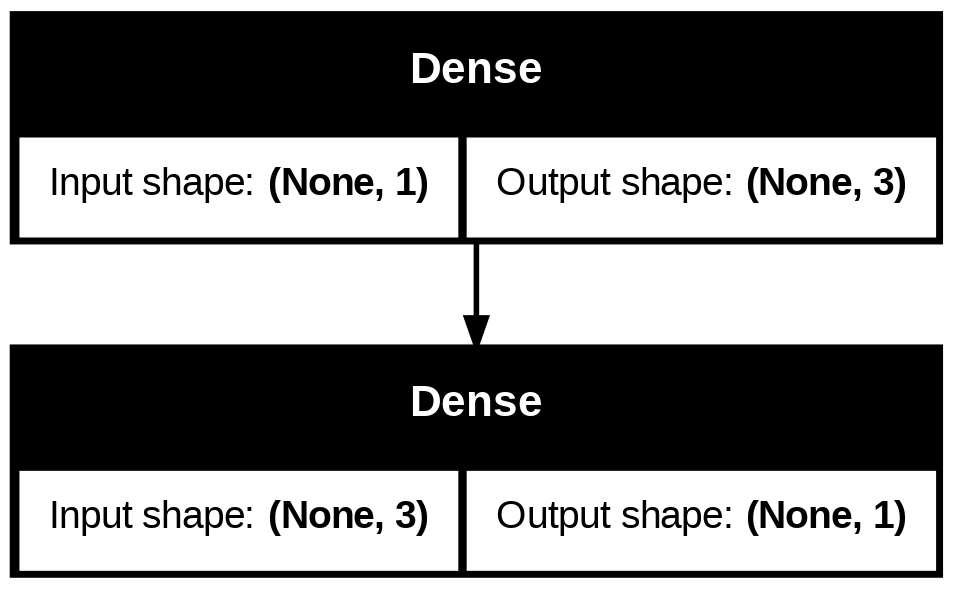

In [52]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

* To visualize predictions, it's a good idea to plot them against the ground truth labels.
* Often we'll see this in the form of *y_test* or *y_true* versus *y_pred* (ground truth versus our model's predictions).

In [53]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[37.529045],
       [39.89643 ],
       [42.263813],
       [44.631203],
       [46.998585],
       [49.36597 ],
       [51.733356],
       [54.100742],
       [56.46813 ],
       [58.835514]], dtype=float32)

In [54]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If we are going to reuse some kind of functionality in the future, it's good idea to turn it into a function.

In [55]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


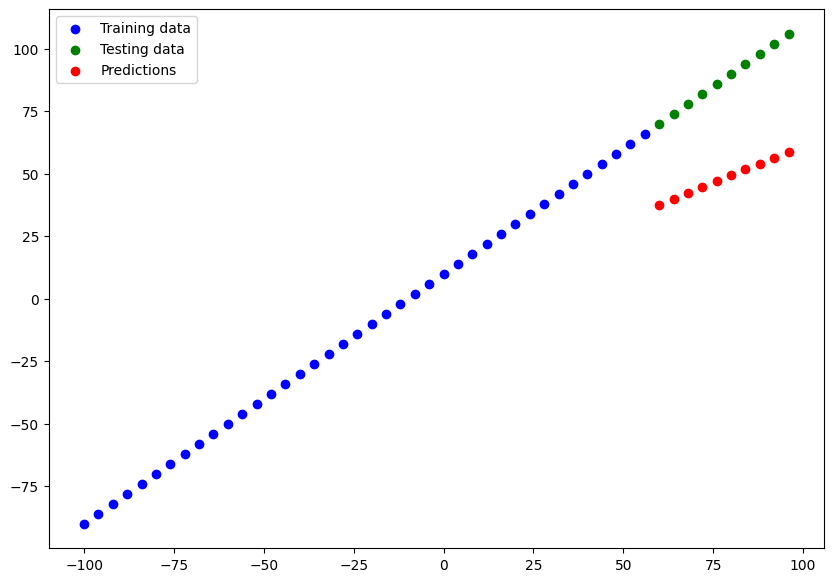

In [56]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluating metrics

Depending on the problem we're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of the model's predictions"
* MSE - mean square error, "on average, how wrong is the square of each of the models predictions"

In [57]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 39.8177 - mae: 39.8177


[39.817718505859375, 39.817718505859375]

In [62]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test, y_pred)
result = mae.result().numpy()
print(result)

39.81772


In [65]:
# Calculate the mean absolute error (in latest version this code will work)
tf.keras.metrics.mae(y_true=y_test,
                     y_pred=y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([32.470955, 34.10357 , 35.736187, 37.368797, 39.001415, 40.63403 ,
       42.266644, 43.899258, 45.53187 , 47.164486], dtype=float32)>

**We should have one output value like previous cell.**

In [66]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[37.529045],
       [39.89643 ],
       [42.263813],
       [44.631203],
       [46.998585],
       [49.36597 ],
       [51.733356],
       [54.100742],
       [56.46813 ],
       [58.835514]], dtype=float32)>

In [67]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### **y_pred** has extra dimention (10, 1) than **y_test** (10,)

In [68]:
# Let's bring out the extra dimension in y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([37.529045, 39.89643 , 42.263813, 44.631203, 46.998585, 49.36597 ,
       51.733356, 54.100742, 56.46813 , 58.835514], dtype=float32)>

In [69]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mae(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=39.817718505859375>

In [ ]:
# Calculate the mean square erro
